# Modelling the data
In the previous notebook we spent a lot of time preparing the data for machine learning. In this notebook we will look at fitting a number of machine learning models to the data and discuss briefly how the algorithms work. Let us begin.

In [1]:
#Data srtuctures and core functionality....
import pandas as pd
import numpy as np

#data viz...
import matplotlib.pyplot as plt
import seaborn as sns

#Core ML library...
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Now we load the data and separate the independent and dependent variables.

In [2]:
df = pd.read_csv('X.csv')
y = df['AVERAGE RETURN'] # independent variable 

# Drop the non-numeric columns from the dependent variables
X = df.drop(
    ["NAME",
    "TICKER",
    "SECTOR",
    "COUNTRY",
    "YEAR",
    "AVERAGE RETURN"],
axis=1)

Now we split the data into a training and test set. We assign an integer value to the ```random_state``` parameter in the ```train_test_split``` function to ensure we get the same split every time in our data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

# Linear Regression
Ordinary least squares regression (OLS), and elastic nets can be classified as types of linear regression models. In this section, we discuss what a linear regression model is and how OLS and elastic nets differ. Let us suppose we have a matrix $\mathbf{X}$ where each row represents a sample and each column represents a feature in the data. So for example

$$
\mathbf{X}
=
\begin{bmatrix}
    \mathbf{x}_1 \\
    \mathbf{x}_2 \\
    \vdots \\
    \mathbf{x}_n
\end{bmatrix}
=
\begin{bmatrix}
    x_{11} & x_{12} & \dots & x_{1m} \\ 
    x_{21} & x_{22} & \dots & x_{2m} \\
    \vdots & \vdots & \dots & \vdots \\
    x_{n1} & x_{n2} & \dots & x_{nm} 
\end{bmatrix}.
$$

In this case there are $n$ samples $\mathbf{x_1}, \mathbf{x_2}, \dots, \mathbf{x_n}$ and each sample has $m$ features. Let us also suppose we have some vector $\mathbf{y}$ that represents the independent variable of the data so we have 

$$
\mathbf{y} = 
\begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_n
\end{bmatrix}.
$$

Here $y_i$ represents the target of our predictions for sample $\mathbf{x}_i$. A linear regression model takes some sample $\mathbf{x}_i$ and makes some prediction $\hat{y}_i$ of the target $y_i$. The general form a linear regression model is as follows

$$
    \hat{y}_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \dots + w_m x_{im},
$$

The coefficients $w_0, w_1, \dots, w_n$ are parameters that are learned during training to ensure that $\hat{y}_i$ is a good prediction of $y_i$. We can shorten the notation by letting 

$$
 \mathbf{w} = 
 \begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_m
\end{bmatrix},
$$

and 

$$
\mathbf{\bar{x}}_i = 
\begin{bmatrix}
    1 & x_{1i} & x_{2i} & \dots & x_{mi}
\end{bmatrix}.
$$

So, in matirx form, we now have

$$
\begin{bmatrix}
    \hat{y}_1 \\
    \hat{y}_2 \\
    \vdots \\
    \hat{y}_n
\end{bmatrix}
=
\begin{bmatrix}
    \mathbf{\bar{x}}_1 \\
    \mathbf{\bar{x}}_2 \\
    \vdots \\
    \mathbf{\bar{x}}_n
\end{bmatrix}
\cdot
\begin{bmatrix}
    w_0 \\
    w_1 \\
    \vdots \\
    w_m
\end{bmatrix}
=
\mathbf{\bar{X}} \mathbf{w}
$$

OLS and elastic nets are two different approaches to learning the parameters $\mathbf{w}$. Let us start by discussing OLS.

## Ordinary least squares regression (OLS)

In OLS the goal is for the model to fit the data perfectly. In other words we want to find $\mathbf{w}$ such that

$$
    \mathbf{y} = \mathbf{\bar{X}} \mathbf{w}.
$$

With a little matrix algebra we get

$$
\begin{align}
    \mathbf{y} & = \mathbf{\bar{X}} \mathbf{w}, \\
    \mathbf{\bar{X}}^T \mathbf{y} & = (\mathbf{\bar{X}}^T \mathbf{\bar{X}}) \mathbf{w}, \\
    ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} \mathbf{\bar{X}}^T \mathbf{\hat{y}} & = ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} (\mathbf{\bar{X}}^T \mathbf{\bar{X}}) \mathbf{w}, \\
    ( \mathbf{\bar{X}}^T \mathbf{\bar{X}} )^{-1} \mathbf{\bar{X}}^T \mathbf{\hat{y}} & = \mathbf{w}.
\end{align}
$$

Here we have found an algebraic solution for $\mathbf{w}$. This is by no means the whole story but it is enough to demonstrate the OLS is not an iterative method. The rest of the models that we will see are iterative in some way.

## Financial Data and statistical Violations of Linear models
While machine learning offer the opportunity to model non-linear relationships, we would be very foolish to un-remember the lessons of 40+ years of Econcomics and stats research. 
For a start:  Is the dependent variable normally distributed or (more likely for a return series) non-stationary and therefore non-normal? Do the residuals have constant variance (homoscedasticity)?

First lets test for normality, using the adjusted ADF test, the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity The more negative the test statistic is, the stronger the rejection of the hypothesis.

In [4]:
#Stats...
import statsmodels.tsa.stattools as sm

result = sm.adfuller(y_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -137.894009
p-value: 0.000000


The results indicate that the indepent variable is stationary, which is good news. Now let's see how an OLS regression performs versus a robust linear model (RLM), which can handle heteroskadisticity:

In [5]:
from statsmodels.api import OLS

#Examine in sample model outputs....

#OLS model - risks violating heteroskadasticity assumptions though
ols_model = OLS(y_train,X_train)
res = ols_model.fit()
print(res.summary())

#robust linear model covers this base...
import statsmodels.api as sm
rlm_model = sm.RLM(y_train, X_train, M=sm.robust.norms.HuberT())
rlm_res = rlm_model.fit()
y_hat = rlm_res.predict(X_train)
rlm_res.summary()

                                 OLS Regression Results                                
Dep. Variable:         AVERAGE RETURN   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              176.1
Date:                Fri, 26 Feb 2021   Prob (F-statistic):                        0.00
Time:                        21:52:35   Log-Likelihood:                         -8769.2
No. Observations:               18769   AIC:                                  1.761e+04
Df Residuals:                   18731   BIC:                                  1.791e+04
Df Model:                          38                                                  
Covariance Type:            nonrobust                                                  
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:         AVERAGE RETURN   No. Observations:                18769
Model:                            RLM   Df Residuals:                    18733
Method:                          IRLS   Df Model:                           35
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 26 Feb 2021                                         
Time:                        21:52:38                                         
No. Iterations:                    50                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Beta_DnSide_24m 12 months prior                    -0.2378      0.064     -3.719      0.000      -0.363      -0.112
Beta_DnSide_24m 24 months prior                     0.0527      0.082      0.641      0.522      -0.108       0.214
Beta_DnSide_24m 36 months prior                     0.1823      0.055      3.290      0.001       0.074       0.291
Diag DebtToEquity 12 months prior                  -0.2525      0.213     -1.183      0.237      -0.671       0.166
Diag DebtToEquity 24 months prior                  -0.0262      0.247     -0.106      0.915      -0.510       0.458
Diag DebtToEquity 36 months prior                  -0.7572      0.444     -1.706      0.088      -1.627       0.113
Diag EPS 12 months prior                        -3.731e+11   2.18e+11     -1.715      0.086   -7.99e+11    5.33e+10
Diag EPS 24 months prior                          2.22e+10    6.9e+09      3.216      0.001    8.67e+09    3.57e+10
Diag EPS 36 months prior                         2.104e+08   2.79e+09      0.075      0.940   -5.25e+09    5.68e+09
Diag EPSGrowth3yrAverage_Rothko 12 months prior     0.7371      0.192      3.831      0.000       0.360       1.114
Diag EPSGrowth3yrAverage_Rothko 24 months prior    -0.0484      0.119     -0.406      0.684      -0.282       0.185
Diag EPSGrowth3yrAverage_Rothko 36 months prior    -0.0244      0.162     -0.150      0.881      -0.343       0.294
Diag FreeCashFlowpershare 12 months prior          -3.5020      9.565     -0.366      0.714     -22.248      15.244
Diag FreeCashFlowpershare 24 months prior          -0.2316      0.559     -0.414      0.679      -1.328       0.865
Diag FreeCashFlowpershare 36 months prior           1.3890     10.750      0.129      0.897     -19.680      22.458
Diag PE 12 months prior                            -0.9392      4.852     -0.194      0.847     -10.449       8.570
Diag PE 24 months prior                             1.3968     10.956      0.127      0.899     -20.076      22.870
Diag PE 36 months prior                             0.1188      3.557      0.033      0.973      -6.853       7.090
Diag ROE 12 months prior                            0.9307      0.333      2.792      0.005       0.277       1.584
Diag ROE 24 months prior                           -1.5542      0.605     -2.568      0.010      -2.741      -0.368
Diag ROE 36 months prior                            1.5022      0.688      2.185      0.029       0.154       2.850
Diag SentimentNews 12 months prior                 -0.0088      0.032     -0.274      0.784      -0.072       0.054
Diag SentimentNews 24 months prior                 -0.0378      0.031     -1.234      0.217      -0.098       0.022
Diag SentimentNews 36 months prior                  0.0232      0.0

Some independent variables register as less important in the RLM than in the OLS model, demonstrating the impact of heteroskedastcity on a naive interpretation.

Eyeballing the residuals is a good way to determine any violations or biases in the training data. We are expecting to see more or less $iid$ residuals. We cant expect this to be perfect but material skews in the distribution would represent a major probl;em with the model:

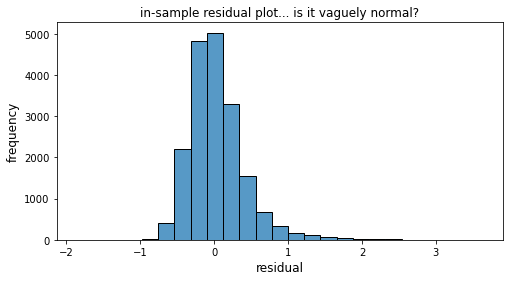

In [6]:
"""
This cell includes both the seaborn and matplotlib histogram plot just to show the difference
"""

#sense check residuals
e_train = y_train - y_hat

fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.histplot(x=e_train, bins=25, ax=ax)

# Add labels
ax.set_title('in-sample residual plot... is it vaguely normal?', fontsize=12)
ax.set_xlabel('residual', fontsize=12)
ax.set_ylabel('frequency', fontsize=12);

In [7]:
from statsmodels.stats.descriptivestats import describe

print("The skew in e_train is %f" % describe(e_train).loc['skew'].values[0])

The skew in e_train is 1.692334


## Linear Models: Conclusions

Linear models do a reasonable job modelling financial data in general. However the assumptions create problems for use on financial data as we have seen. It is also the case that the more independent variables you throw at a linear regression model the greater the explanatory power will be, and the higher the error is likely to be out of sample. This issue is known as overfit or variance and is addressed by fudges like ***adjusted $R^\mathbf{2}$***. 

This poses key questions for how we construct models:

1) How to select the most powerful indepdent variables? 
2) How to combine these?

This brings us onto the topic of regularisation, or exerting a cost for having non-zero model weights.

## L1 and L2 Regularisation 

Regularisation penalises a model for having non-zero parameters and therefore provide a trade off between the reduction in error an increased model weight may result in, counter balanced by exerting a cost for increasing the absolute weight itself. L1 and L2 are the most common forms of regularisation, improving generalisation of models by reducing overfit. 

Regularisation is generally applied in the process of gradient descent, which iteratively adjusts parameters in the model to reduce a loss function. We will use mean squared error (MSE) as our loss function. 

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2.
$$

Often times this iterative learning can lead to parameters that are very large. Regularisation can be implemented by adding a term to the loss function. 

L1 regularisation, as used in lasso (least absolute shrinkage and selction operator) regression is as follows:

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{m}| w_j |.
$$

Where $\alpha$ is a hyperparameter that we can adjust to change how much the regularisation term affects the loss. (Where $\alpha = 0$ means the regularisation term has no effect on the loss).


L2 regularisation, as used in ridge regression is as follows:


$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{m} w_j^2 .
$$

The main difference between L1 and L2 is that...

- L1 more aggressively shrinks less important features to zero
    >> Use for feature selection, where you have many features you need to choose between
- L2 allows more features with smaller values.
    >> Use for smaller data sets, or use where dependent variables are all likely to have an impact.

Clearly, the value of $\alpha$ is critically important to make sure we do not too aggressively shrink model parameters (ie introduce too much bias), or too readily accept model parameters that will damage generalisation (ie introduce too much variance). 


## 1.3 Elastic nets regularisation

Elastic nets combine L1 and L2 regularisation. The fitting process uses gradient descent to iteratively adjust the value of the model parameters to reduce a loss function.  Elastic nets include both the lasso and ridge regression terms as follows:

$$
    L = \sum_{i = 1}^{n} (y_i - \hat{y}_i)^2 +  \alpha \left( \lambda \sum_{i=1}^{m}|w|_j + (1 -\lambda)\sum_{i=1}^{m}w_j^2 \right).
$$

Where $\lambda$ is a hyperparameter between 0 and 1 that allows us to adjust how much the lasso and ridge regularisation terms contribte to the loss.

Let us look at how $\alpha$, and $\lambda$ affect the weights of the coefficients in the models.


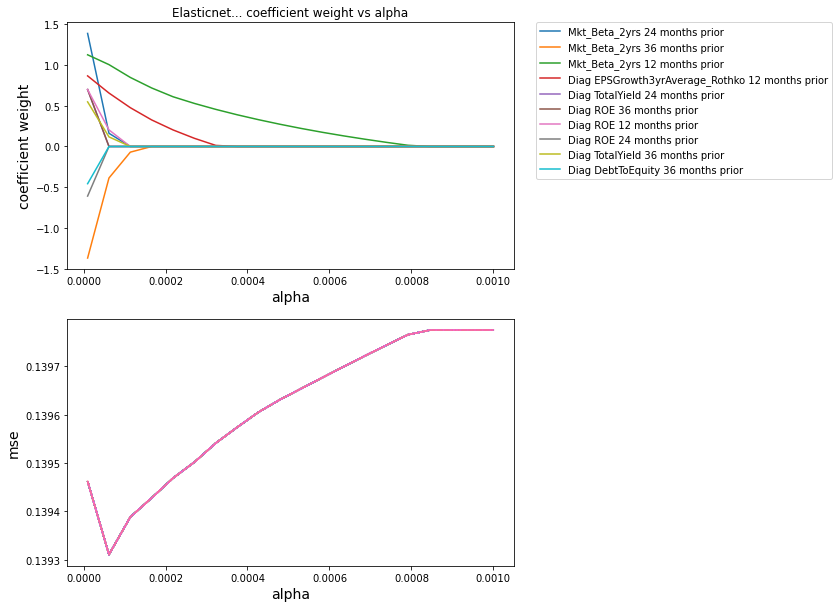

In [8]:
from sklearn.linear_model import ElasticNet

n = 20
alphas = np.linspace(0.00001,0.001, n) # generate n equally space points between 0.00001, and 0.001

coefficients = pd.DataFrame(index=X.columns) 
mse = pd.DataFrame(columns=X.columns)

for alpha in alphas:
    EN = ElasticNet(alpha=alpha)
    EN.fit(X_train, y_train)
    y_hat = EN.predict(X_test)
    
    # add a column alpha containing the weights of the coefficients of the model
    coefficients[alpha] = EN.coef_
    
    #save the MSE for this value of alpha....
    mse.loc[alpha] = mean_squared_error(y_hat, y_test)

# select the rows with the 10 largest absolutes value for the first value of alpha
coefficients = coefficients.loc[
    coefficients.abs().nlargest(10, coefficients.columns[0]).index, :
]

#Plot the relationship between alpha and coefficient weight
fig, ax = plt.subplots(2, 1, figsize=(8,10))
sns.lineplot(data=coefficients.T, dashes=False, ax=ax[0])
ax[0].set_title('Elasticnet... coefficient weight vs alpha')
ax[0].legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.) # place the legend outside of the plot
ax[0].set_xlabel("alpha", fontsize=14)
ax[0].set_ylabel("coefficient weight", fontsize=14);

# alpha and mse
sns.lineplot(data=mse, ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel("alpha", fontsize=14)
ax[1].set_ylabel("mse", fontsize=14);

In the above plot, we see that as $\alpha$ is increased the coefficients in the model tend to get smaller. In this case, you can see that the features we have supplied to the model have been, generally accurately selectedby our analysts.

Now let us look at how the ```l1_ratio``` affects the coefficients of the model. 

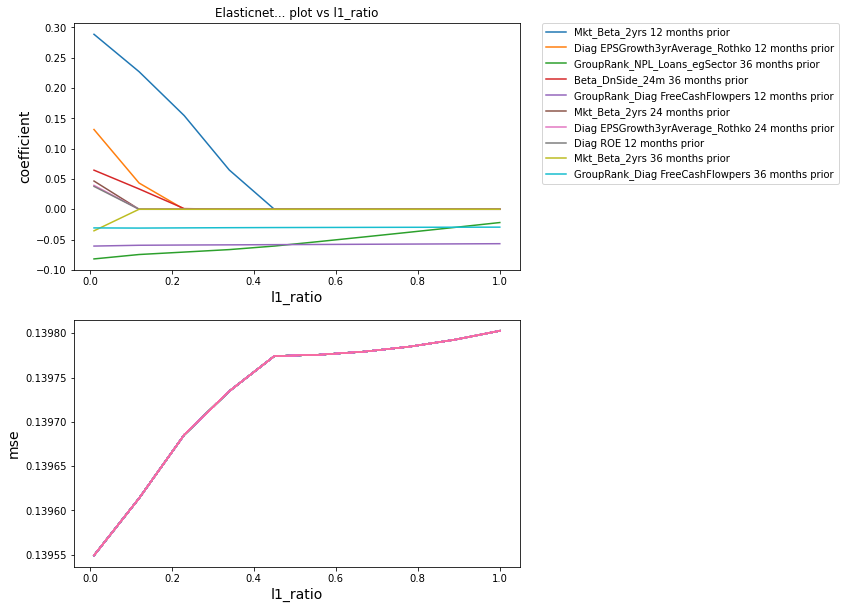

In [9]:
n = 10
l1_ratios = np.linspace(0.01, 1, n) # I did not include 0 since the model didn't converge in this case

coefficients = pd.DataFrame(index=X.columns)
mse = pd.DataFrame(columns=X.columns)
for l1_ratio in l1_ratios:
    EN = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    EN.fit(X_train, y_train)     
    y_hat = EN.predict(X_test)
    
    # add a row indexed alpha containing the coefficients of the model
    coefficients[l1_ratio] = EN.coef_    
     
    #save the MSE of this value of alpha....
    mse.loc[l1_ratio] = mean_squared_error(y_hat, y_test)  
    
# select the rows with the 10 largest absolutes value for the first value of alpha
coefficients = coefficients.loc[
    coefficients.abs().nlargest(10, coefficients.columns[0]).index, :
]

fig, ax = plt.subplots(2, 1, figsize=(8,10))
sns.lineplot(data=coefficients.T, dashes=False, ax=ax[0])
ax[0].set_title('Elasticnet... plot vs l1_ratio')
ax[0].legend(bbox_to_anchor=(1.05, 1.), loc=2, borderaxespad=0.) # place the legend outside of the plot
ax[0].set_xlabel("l1_ratio", fontsize=14)
ax[0].set_ylabel("coefficient", fontsize=14);

#... alpha and mse
sns.lineplot(data=mse, dashes=False, ax=ax[1])
ax[1].get_legend().remove()
ax[1].set_xlabel("l1_ratio", fontsize=14)
ax[1].set_ylabel("mse", fontsize=14);

Now that we have seen how ```alpha``` and the ```l1_ratio``` affect the coefficients in the model, let us try and pick a good combination of hyperparameters to fit the data. To do this we will use grid search cross validation. This allows us to define a space of hyperparameters to try, evaluate the performance of the model with each combination of hyperparameters, and pick the best hyperparameters that fit the test set the best.

Hyperparameter search results. Alpha: 0.0001 ; L1_ratio= 0.1


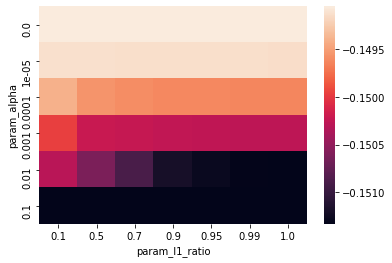

In [10]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model = ElasticNet()

# Define the search we want to do on alpha and l1_ratio...
grid = {
    "alpha" : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0],
    'l1_ratio' : [.1, .5, .7, .9, .95, .99, 1]
}

# the cross validation we want to tune on...
cv = RepeatedKFold(
    n_splits=10, # number of subsets that the data is split into
    n_repeats=5  # number of times the data is randomly split into subsets
)

# Grid search... note that we pass an ElasticNet() function handle in, to then grid search alpha and l1_ratio, minimising the neg_mean_squared_error...
search = GridSearchCV(model, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, return_train_score=True)
res = search.fit(X_train, y_train)


# Plot the results from the grid search as a heat map
results = pd.DataFrame(search.cv_results_,
    columns=['param_alpha', 'param_l1_ratio', 'mean_train_score']
)
results = results.pivot(index='param_alpha', columns='param_l1_ratio', values='mean_train_score')
sns.heatmap(results);

print('Hyperparameter search results. Alpha:', search.best_estimator_.alpha, '; L1_ratio=', search.best_estimator_.l1_ratio)

Let us see how the best model performs on the test set.

In [11]:
mse = ((res.predict(X_test) - y_test) ** 2).mean() # mean squared error
print("MSE: ", mse)

MSE:  0.1393397387788312


# Random forest

In this section, we will look at fitting a random forest to the data. Let us try and build some intuition behind what a random forest is and how it works. A random forest is an ensemble method that fits a number of decision trees to the data and makes an overall prediction based on the predictions of the individual decision trees. Let us fit one desicision tree to the data and see what it looks like.

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree # for visualising the decision trees

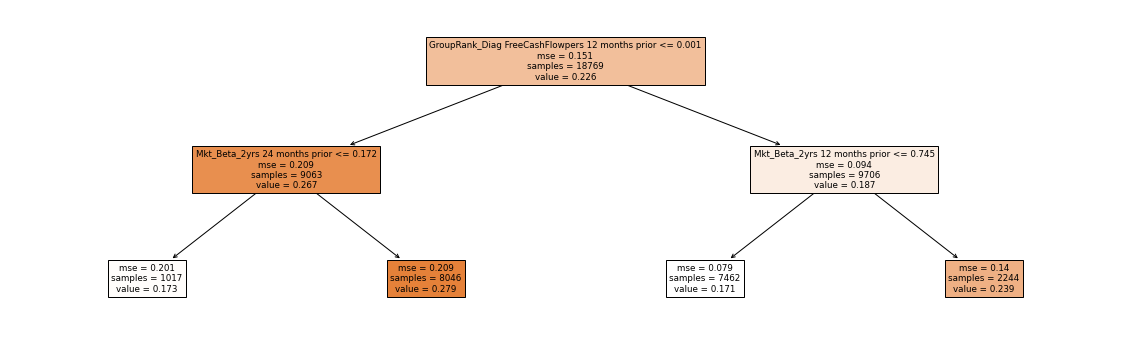

In [13]:
# good source of decision trees https://gdcoder.com/decision-tree-regressor-explained-in-depth/
rf = RandomForestRegressor(
    n_estimators = 1,  # limit the model to only 1 decision tree
    criterion = 'mse',
    max_depth = 2,     # limit the depth of the decision tree to 2
    bootstrap=False    # this ensure the decision tree uses the entire dataset
)

rf.fit(X_train, y_train)
trees = rf.estimators_ # a list of the decision trees

# plot the decision tree
fig, ax = plt.subplots(1, 1, figsize=(20,6))
tree.plot_tree(
    trees[0],
    feature_names = X.columns, # labels the feature that each node is making a decision on
    filled = True,
    ax=ax
);

The above diagram shows the decision tree in our model. Look at the top node. The labels can be interpreted as follows:

- ```GroupRank_Diag FreeCashFlowpers 12 months prior <= 0.001``` - This is the condition that is used in this note to split the data. Any samples for which this condition are true are sent to the left node and any samples for which this condition is false are sent to the right node.

- ```samples = 18769``` - The number of samples in the node. 
- ```value = 0.226``` - This is the prediction ($\hat{y}$) that is given to each sample in the node. 
- ```mse = 0.226``` - The mean squared error if all the samples in the node were given the value 0.226.

Note that the leaf nodes (the nodes at the bottom diagram) how not condition since no splitting of the data is done at this point. 

Now let us fit a bigger random forest to the data.

In [18]:
rf = RandomForestRegressor(criterion = 'mse')
rf.fit(X_train, y_train)
mse_test = mean_squared_error(y_test, rf.predict(X_test))
mse_train = mean_squared_error(y_train, rf.predict(X_train))

print("MSE test: ", mse_test)
print("MSE train: ", mse_train)

MSE test:  0.13182235656794894
MSE train:  0.01989257636175166


Now let us have a look at the structure of one of the decision trees.

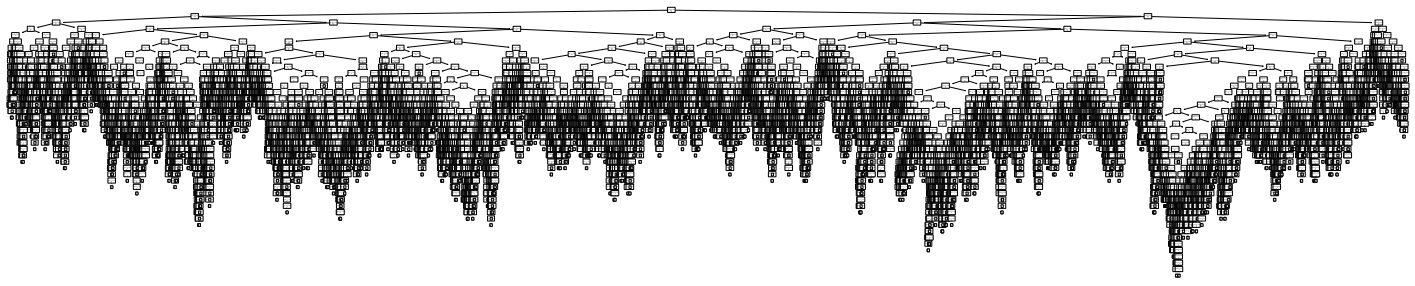

In [46]:
"""
This cell has been commented out to avoid accidentally running it as it takes quite a while to run.

trees = rf.estimators_

fig, ax = plt.subplots(1, 1, figsize=(25,5))
tree.plot_tree(
    trees[0],
    #max_depth=4,
    #feature_names = X.columns, # labels the feature the each node is making a decision on
    rounded=True,
    impurity=False,
    label=None,
    ax=ax,
    precision=0
);
"""

Just to reiterate this 1 of 100 decision trees in the random forest. They can get very complicated.

One of the main benefits of decision trees is they allow us to measure the importance of a feature in making predictions. For the entire random forest, we can calculate the mean feature importance across all the decision tree to get an idea of the important features across the entire random forest.

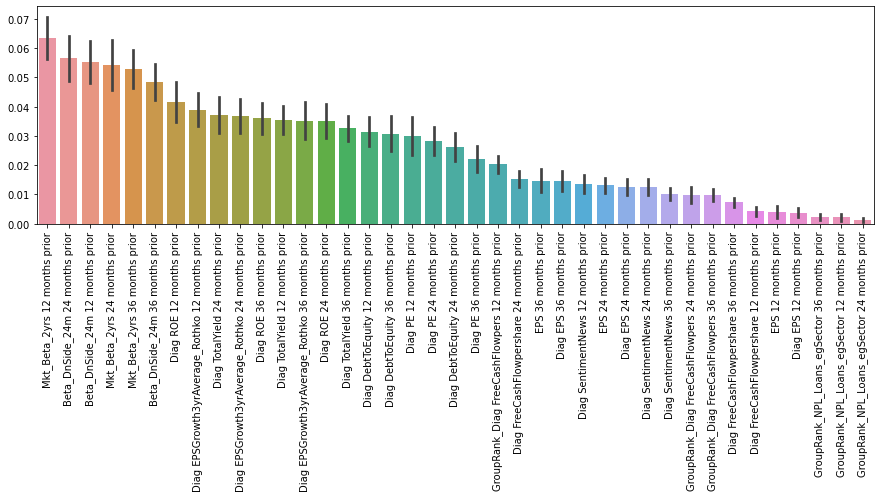

In [19]:
trees = rf.estimators_
feature_importances = pd.DataFrame(index = X.columns) # dataframe to store the feature importances

for i in range(len(trees)):
    col_name = "tree_" + str(i)
    feature_importances[col_name] = trees[i].feature_importances_

# now we find the mean feature importance for each feature
tree_names = feature_importances.columns
feature_importances['mean_feature_importance'] = feature_importances[tree_names].mean(axis=1)

feature_importances = feature_importances.sort_values(by=['mean_feature_importance'], ascending=False)

feature_importances = feature_importances.drop('mean_feature_importance', axis=1)

# plot the mean feature importances
fig, ax = plt.subplots(1,1,figsize=(15,4))
sns.barplot(
    data=feature_importances.T, 
    ax=ax,
    ci="sd" # include standard deviation error bars
)
# rotate the x-axis labels by 90 degrees
ax.set_xticklabels(rotation=90, labels=feature_importances.index);

## Neural networks

In this section, we will implement a simple neural network in Pytorch to model our data. The network architeture we will use is shown below.

<img src="Images\nn.png" width="300"> 

On the left we have 12 input notes that will represent each of our 12 independent variables. We have 10 nodes in the hidden layer, and we have 1 out node in the output layer. In the ouput layer, we have one node which will give us the prediction for the dependent variable. 

We will implement our neural network using PyTorch. PyTorch is a fantastic deep learing library that is far too complicated to cover in this notebook. We will go through the essentials to get a neural network up and running. If the reader is interested in looking into PyTorch further I would recommend looking at the [official PyTorch tutorials](https://pytorch.org/tutorials/) to get started.

In [94]:
import torch # import pytorch

Our data has 39 features, so we will create a neural network with 51 input nodes, 10 hidden nodes, and 1 ouput node.

In [95]:
# We use the sequential function to 
model = torch.nn.Sequential(
    torch.nn.Linear(39, 10),   # input layer
    torch.nn.ReLU(),           # activation function for the input layer
    torch.nn.Linear(10, 1)    # Hidden layer
)

Now that we have defined our model we need to define a training loop for our model. To make things a little more clear, let us run through the fundamental components of the training loop that we will use:

1. Epochs. Training a neural can be broken down into epochs. An epoch is defined as a cycle through the entire training data. Since neural networks usually contain lots (tens of millions in some cases) of parameters, we have train them slowly using a very small learning rate. We therefore have to pass the training data through the network multiple times to give the network chance to learn the data. 

2. Loss function. A loss function is what we use to determine how well our model is performing. In our model we will use mean squared error which can be called in Pytorch using the ```torch.nn.MSELoss``` function. Pytorch also uses this loss function to calculate gradients that are used to update the parameters of the model.

3. Optimizer. An optimizer in Pytorch lets us define how we want the parameters in our model to be updated. In our model we will use stochastic gradient descent which can be called using the ```torch.optim.SGD()``` function. 

5. Calculating the training and test loss. After each epoch it is usually a good idea to see how the model performs on the entire training set and the test set. However there is a small hurdle we have to be aware doing this in Pytorch. Pytorch uses a very clever technique called [auto-differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) to automatically calculate the gradients used to update the weights in a model. This is computationally expensive and is not needed during testing since we do not want to update the parameters of the model during testing. We can briefly turn off Pytorch's auto-differentiation engine by using ```with torch.no_grad():``` which turns off auto-differentiation for any code in that block. This allows us to quickly test the performance of the model without performing any expensive auto-differentiation.

Now let us write our training loop.

In [97]:
# We must convert our data into pytorch tensors which are similar to numpy arrays.
X_train_tensor = torch.from_numpy(X_train.values).float()
y_train_tensor = torch.from_numpy(y_train.values).float()
X_test_tensor = torch.from_numpy(X_test.values).float()
y_test_tensor = torch.from_numpy(y_test.values).float()

# An optimiser is a method of updating the weights of the model after each step
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Define mean squared error as the loss function we are trying to minimize
loss_fn = torch.nn.MSELoss()
loss_train_hist = []
loss_test_hist = []

epochs = range(150)
for epoch in epochs:
    # set any accumulated gradients from the previous step to zero
    optimizer.zero_grad() 
    
    # make a prediction on the training set
    y_hat = model(X_train_tensor) 
    
    # calculate the mean squared error between the prediction and true value
    loss_train = loss_fn(y_hat, y_train_tensor)
    
    loss_train.backward()  # calculate the gradients dloss/dw where w is a parameter in the model
    optimizer.step() # update the parameters the gradient according to dloss/dw
    
    # calculate the MSE on the test set
    with torch.no_grad():
        y_hat = model(X_test_tensor)
        loss_test = loss_fn(y_hat, y_test_tensor)
        
    loss_train_hist.append(loss_train)
    loss_test_hist.append(loss_test)
        
    # print the loss every 25 epochs
    if (epoch % 5 == 0):
        print("Epoch %i  training error %f  test error %f" % (epoch, loss_train.item(), loss_test.item()))

Epoch 0  training error 0.189451  test error 0.174806
Epoch 5  training error 0.187828  test error 0.173274
Epoch 10  training error 0.186280  test error 0.171815
Epoch 15  training error 0.184803  test error 0.170425
Epoch 20  training error 0.183393  test error 0.169100
Epoch 25  training error 0.182048  test error 0.167837
Epoch 30  training error 0.180765  test error 0.166632
Epoch 35  training error 0.179540  test error 0.165484
Epoch 40  training error 0.178371  test error 0.164390
Epoch 45  training error 0.177256  test error 0.163347
Epoch 50  training error 0.176191  test error 0.162353
Epoch 55  training error 0.175175  test error 0.161405
Epoch 60  training error 0.174204  test error 0.160500
Epoch 65  training error 0.173278  test error 0.159638
Epoch 70  training error 0.172393  test error 0.158816
Epoch 75  training error 0.171549  test error 0.158032
Epoch 80  training error 0.170742  test error 0.157285
Epoch 85  training error 0.169971  test error 0.156572
Epoch 90  tr

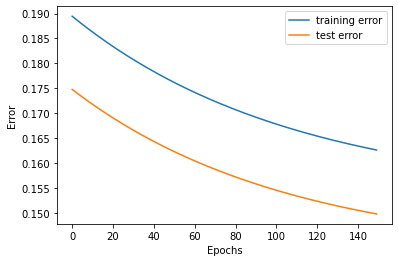

In [100]:
plt.plot(epochs, loss_train_hist, label = 'training error')
plt.plot(epochs, loss_test_hist, label = 'test error')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend();

Having run the neural network for 150 epochs, the best error we got from the neural network was still worse than what we got with the random forest. Judging from the training curves above, training the network for more epochs likely would reduce the test error but perhaps not enough to justify the training time. The poor results from the neural network are not all that surprising since they are notoriously bad at modelling tabular data.